In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
#load integrated data
total_dataset = pd.read_csv('../data/integrated_data.csv')
total_dataset.head()

,Unnamed: 0,District,Rooms,Male emp. Agriculture,Male emp. Industry,Male emp. Services,Total Male Employment,Female emp. Agriculture,Female emp. Industry,Female emp. Services,...,"Cheating/Misappropriation C.B. Trust > Rs.100,000",Theft of Property (praedial produce > Rs.5000),Counterfeiting Currency,Offences against State,Cruelty & sexual exploitation of children,Procuration / Trafficking,Offences under the Offensive weapons Act.,Possess Automatic/ Repeater Shot Guns,"Offence under Poisons, Opium & Dangerous Drugs",2012
0,0,Ampara,610.0,13.8,19.0,26.9,59.7,1.8,4.1,44.7,...,232.0,242.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,648.06
1,1,Anuradhapura,979.0,3.7,6.0,27.0,36.7,1.7,5.5,18.0,...,270.0,584.0,6.0,0.0,23.0,2.0,4.0,1.0,7.0,856.23
2,2,Badulla,765.0,17.0,9.9,21.5,48.4,23.7,4.8,17.3,...,138.0,296.0,1.0,0.0,2.0,0.0,3.0,0.0,20.0,811.76
3,3,Batticaloa,883.0,20.9,18.1,26.0,64.9,2.1,4.0,33.2,...,225.0,221.0,1.0,0.0,6.0,3.0,1.0,1.0,3.0,525.14
4,4,Colombo,7519.0,1.1,20.6,42.9,64.7,1.3,20.0,50.5,...,1736.0,2809.0,4.0,0.0,52.0,1.0,21.0,6.0,573.0,2309.81


In [3]:
map_shape = "../data/map_shape/LKA_adm1.shp"
map_df = gpd.read_file(map_shape)
map_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,217,LKA,Sri Lanka,1,Ampara,Distrikkaya,District,None,Amparai,(POLYGON ((81.78319549560564 7.448750019073543...
1,217,LKA,Sri Lanka,2,Anuradhapura,Distrikkaya,District,None,None,"POLYGON ((80.79398345947294 8.917964935302848,..."
2,217,LKA,Sri Lanka,3,Badulla,Distrikkaya,District,None,None,"POLYGON ((80.98494720458979 7.61256122589117, ..."
3,217,LKA,Sri Lanka,4,Batticaloa,Distrikkaya,District,None,None,(POLYGON ((81.80958557128912 7.494583129882926...
4,217,LKA,Sri Lanka,5,Colombo,Distrikkaya,District,None,None,(POLYGON ((79.90155029296903 6.714582920074406...


In [4]:
#adding district names
map_df["NAME_2"] = map_df["NAME_1"]
map_df["center"] = map_df["geometry"].centroid
map_df_points = map_df.copy()
map_df_points.set_geometry("center", inplace = True)

In [5]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index("NAME_1").join(total_dataset.set_index("District"))
merged.head()

,ID_0,ISO,NAME_0,ID_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,NAME_2,...,"Cheating/Misappropriation C.B. Trust > Rs.100,000",Theft of Property (praedial produce > Rs.5000),Counterfeiting Currency,Offences against State,Cruelty & sexual exploitation of children,Procuration / Trafficking,Offences under the Offensive weapons Act.,Possess Automatic/ Repeater Shot Guns,"Offence under Poisons, Opium & Dangerous Drugs",2012
NAME_1,,,,,,,,,,,,,,,,,,,,,
Ampara,217,LKA,Sri Lanka,1,Distrikkaya,District,None,Amparai,(POLYGON ((81.78319549560564 7.448750019073543...,Ampara,...,232.0,242.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,648.06
Anuradhapura,217,LKA,Sri Lanka,2,Distrikkaya,District,None,None,"POLYGON ((80.79398345947294 8.917964935302848,...",Anuradhapura,...,270.0,584.0,6.0,0.0,23.0,2.0,4.0,1.0,7.0,856.23
Badulla,217,LKA,Sri Lanka,3,Distrikkaya,District,None,None,"POLYGON ((80.98494720458979 7.61256122589117, ...",Badulla,...,138.0,296.0,1.0,0.0,2.0,0.0,3.0,0.0,20.0,811.76
Batticaloa,217,LKA,Sri Lanka,4,Distrikkaya,District,None,None,(POLYGON ((81.80958557128912 7.494583129882926...,Batticaloa,...,225.0,221.0,1.0,0.0,6.0,3.0,1.0,1.0,3.0,525.14
Colombo,217,LKA,Sri Lanka,5,Distrikkaya,District,None,None,(POLYGON ((79.90155029296903 6.714582920074406...,Colombo,...,1736.0,2809.0,4.0,0.0,52.0,1.0,21.0,6.0,573.0,2309.81


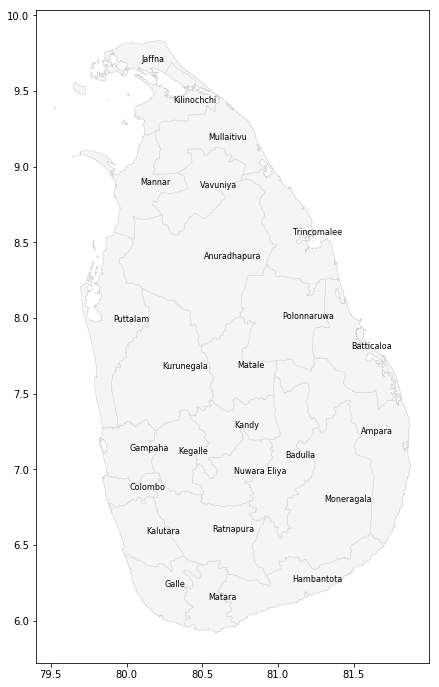

In [6]:
ax = merged.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
texts = []
for x, y, label in zip(map_df_points.geometry.x, map_df_points.geometry.y, map_df_points["NAME_1"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

In [7]:
def plot_map(data_frame,variable):
    vmin = data_frame[variable].max()
    vmax = data_frame[variable].min()
    fig, ax = plt.subplots(1, figsize=(20, 10))
    data_frame.plot(variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    #ax.axis(‘off’)
    ax.set_title(variable +' in Sri Lanka', fontdict={'fontsize': '25', 'fontweight' : '3'})
    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)

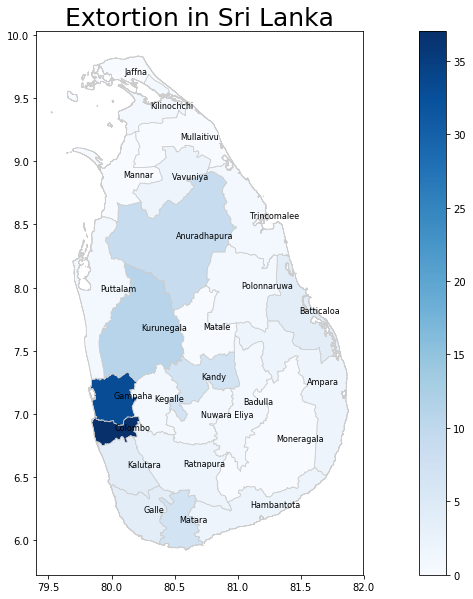

In [8]:
plot_map(merged,'Extortion')
texts = []
for x, y, label in zip(map_df_points.geometry.x, map_df_points.geometry.y, map_df_points["NAME_1"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

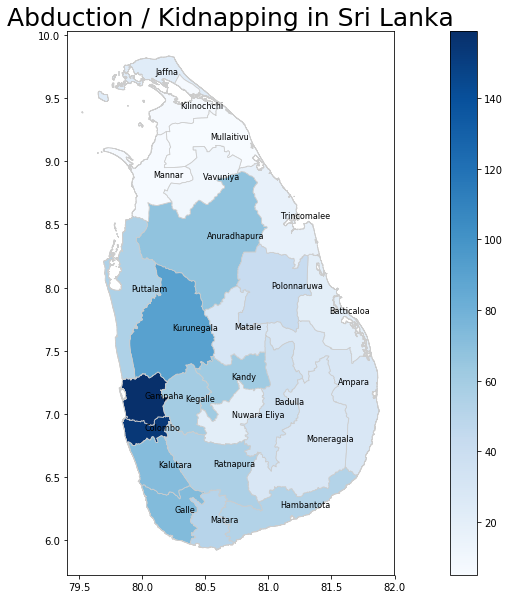

In [9]:
plot_map(merged,'Abduction / Kidnapping')
texts = []
for x, y, label in zip(map_df_points.geometry.x, map_df_points.geometry.y, map_df_points["NAME_1"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

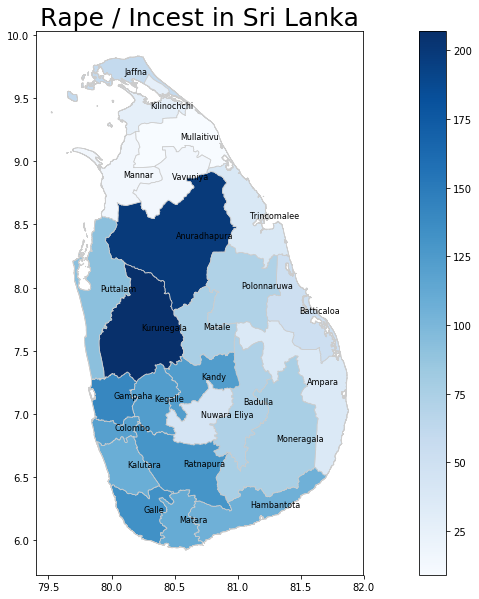

In [10]:
plot_map(merged,'Rape / Incest')
texts = []
for x, y, label in zip(map_df_points.geometry.x, map_df_points.geometry.y, map_df_points["NAME_1"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

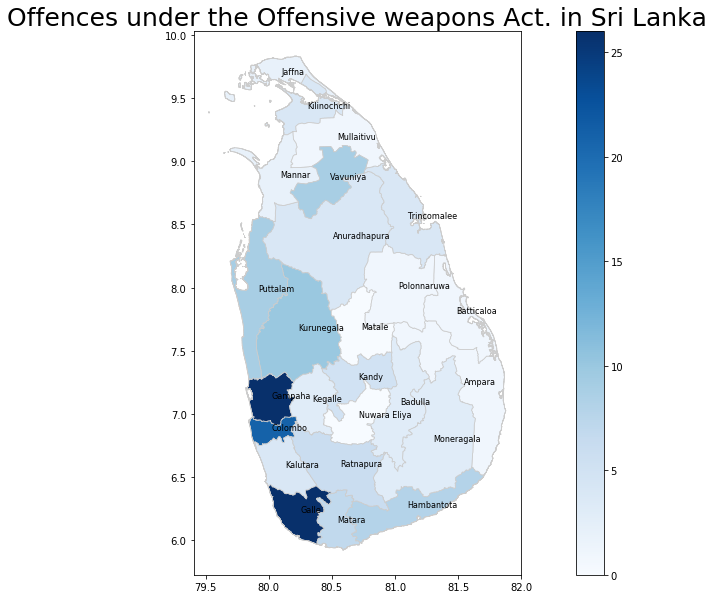

In [11]:
plot_map(merged,'Offences under the Offensive weapons Act.')
texts = []
for x, y, label in zip(map_df_points.geometry.x, map_df_points.geometry.y, map_df_points["NAME_1"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

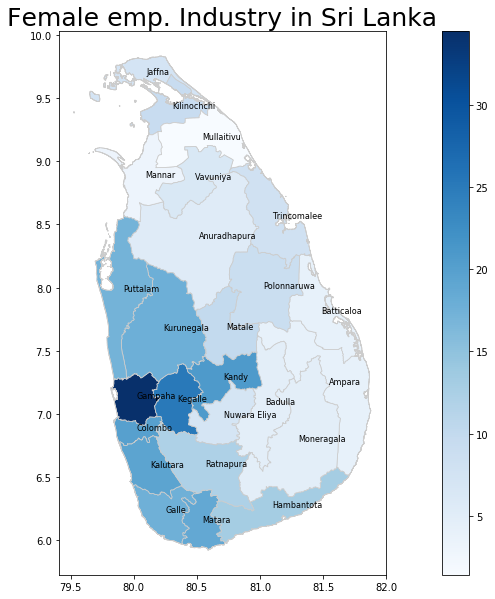

In [12]:
plot_map(merged,'Female emp. Industry')
texts = []
for x, y, label in zip(map_df_points.geometry.x, map_df_points.geometry.y, map_df_points["NAME_1"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

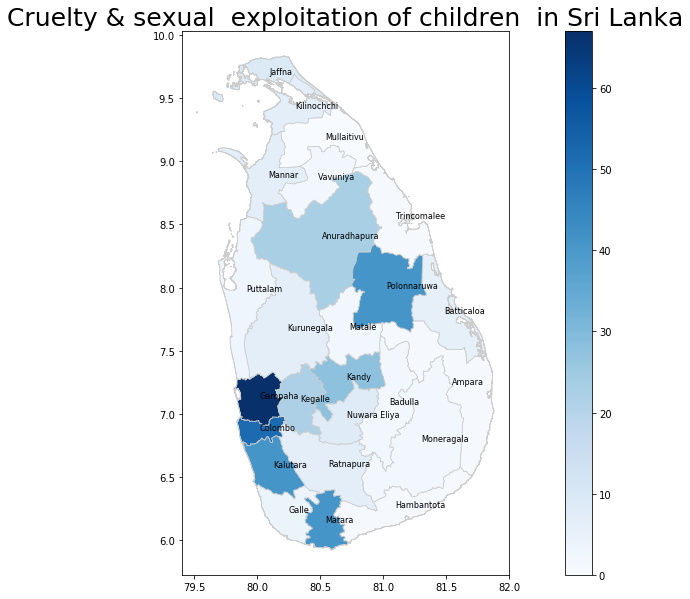

In [13]:
plot_map(merged,'Cruelty & sexual  exploitation of children ')
texts = []
for x, y, label in zip(map_df_points.geometry.x, map_df_points.geometry.y, map_df_points["NAME_1"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

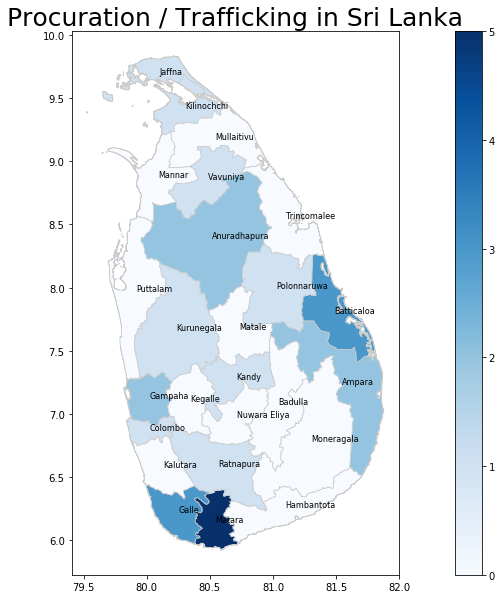

In [14]:
plot_map(merged,'Procuration / Trafficking')
texts = []
for x, y, label in zip(map_df_points.geometry.x, map_df_points.geometry.y, map_df_points["NAME_1"]):
    texts.append(plt.text(x, y, label, fontsize = 8))